Load and prepare data for plotting


In [1]:
import pandas as pd
data = pd.read_csv('../../data/ecommerce_data.csv')
dictTime = {0: '0to6', 1: '6to12', 2: '12to18', 3: '18to24'}
dictBol = {0: 'False', 1: 'True'}
dictAction = {0: 'bounce', 1: 'add_to_cart ',2: 'begin_checkout', 3: 'finish_checkout'}
mapped_data = data.copy()
mapped_data.time_of_day = mapped_data.time_of_day.map(dictTime)
mapped_data.user_action = mapped_data.user_action.map(dictAction)
mapped_data.is_mobile = mapped_data.is_mobile.map(dictBol)
mapped_data.is_returning_visitor = mapped_data.is_returning_visitor.map(dictBol)
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
pylab.rcParams["font.size"] = "13"

Populating the interactive namespace from numpy and matplotlib


For plotting we will use seabron and matplotlib. <br>
Seaborn is an extension of matplotlib which enhances some features


In [2]:
import seaborn as sns
    import matplotlib.pyplot as plt

By plotting a boxplot we can examine how the distribution of our data is. <br>
<img src="img/boxplot_descr.png">
mean (=Mittelwert != Median): Sum of all value / count of values <br>
For calculation of quantiles the values in a column are ordered# Print description of dataset which contains the count of rows in each column as well as the mean, standard deviation and important quartiles. Calculation for quartiles and theire meaning: <br>
even count of rows: <br>
* 0.25 quantile: data \[round(rowCount*0.25)\]
* 0.5 quantile (= median != Mittelwert): 0.5 * (data\[rowCount / 2\] + data\[rowCount / 2 + 1\])
* 0.75 quantile: data\[round(rowCount*0.75)\] <br>
odd count of rows:
* 0.25 quantile: data\[round(rowCount*0.25)\]
* 0.5 quantile:  data\[round(rowCount*0.5)\]
* 0.75 quantile: data\[round(rowCount*0.75)\]


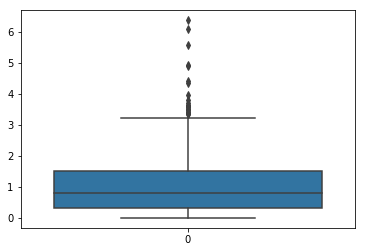

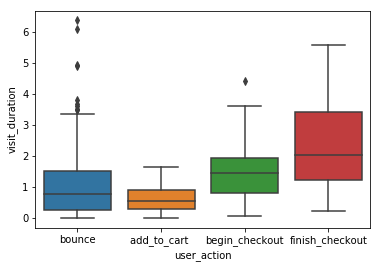

In [3]:
sns.boxplot(data=mapped_data.visit_duration)
plt.show()
# data is our test data
# sns is the short form of seaborn
sns.boxplot(data=mapped_data, x='user_action',y='visit_duration')
plt.show()

A scatter plot can be usefull to analyze the correlation between two variables

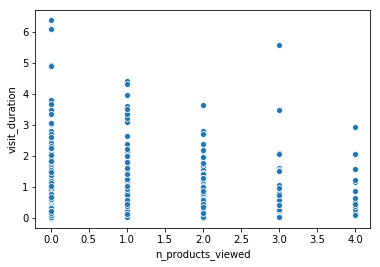

In [4]:
sns.scatterplot(data=data, x='n_products_viewed', y='visit_duration')
plt.show()

A better example for a scatter plot would be the Correlation between gfender and weight/height which is shown in the image below. 
<img src='img/scatter_heightweight.png'>

Count plots are a good feature of seaborn to save some time to count values by ourselves

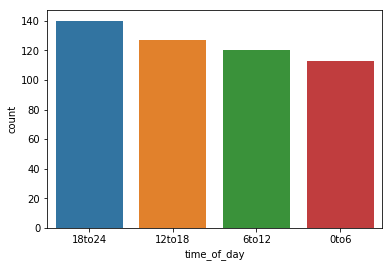

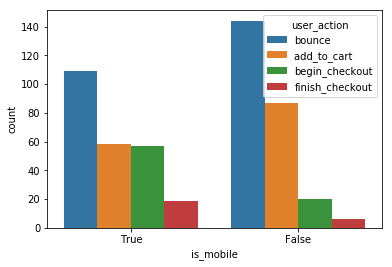

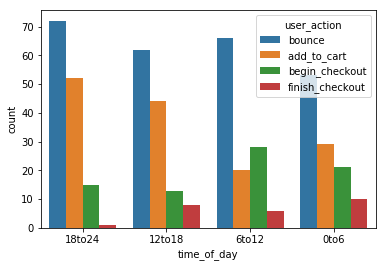

In [5]:
sns.countplot(mapped_data.time_of_day)
plt.show()
sns.countplot(x=mapped_data.is_mobile, hue=mapped_data['user_action'])
plt.show()
sns.countplot(x=mapped_data.time_of_day, hue=mapped_data['user_action'])
plt.show()

A heatmap is good to view the correlation between the features and labels <br>
Correlation can indicate the existence of a causal relationship. <br>
Pandas has 3 different methods to calculate the correlation (pearson, kendall, spearman)
For information how the correlation is calculated look at: 
https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials

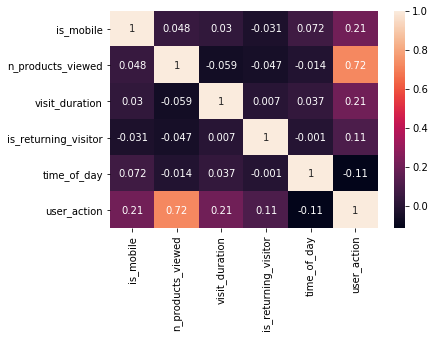

In [6]:
data = data.drop(labels=[])
correlation = data.corr()
sns.heatmap(correlation, annot=True, )
plt.show()

There are also some plot  collections available in seaborn
One example for this is the pairplot which can plot up to 

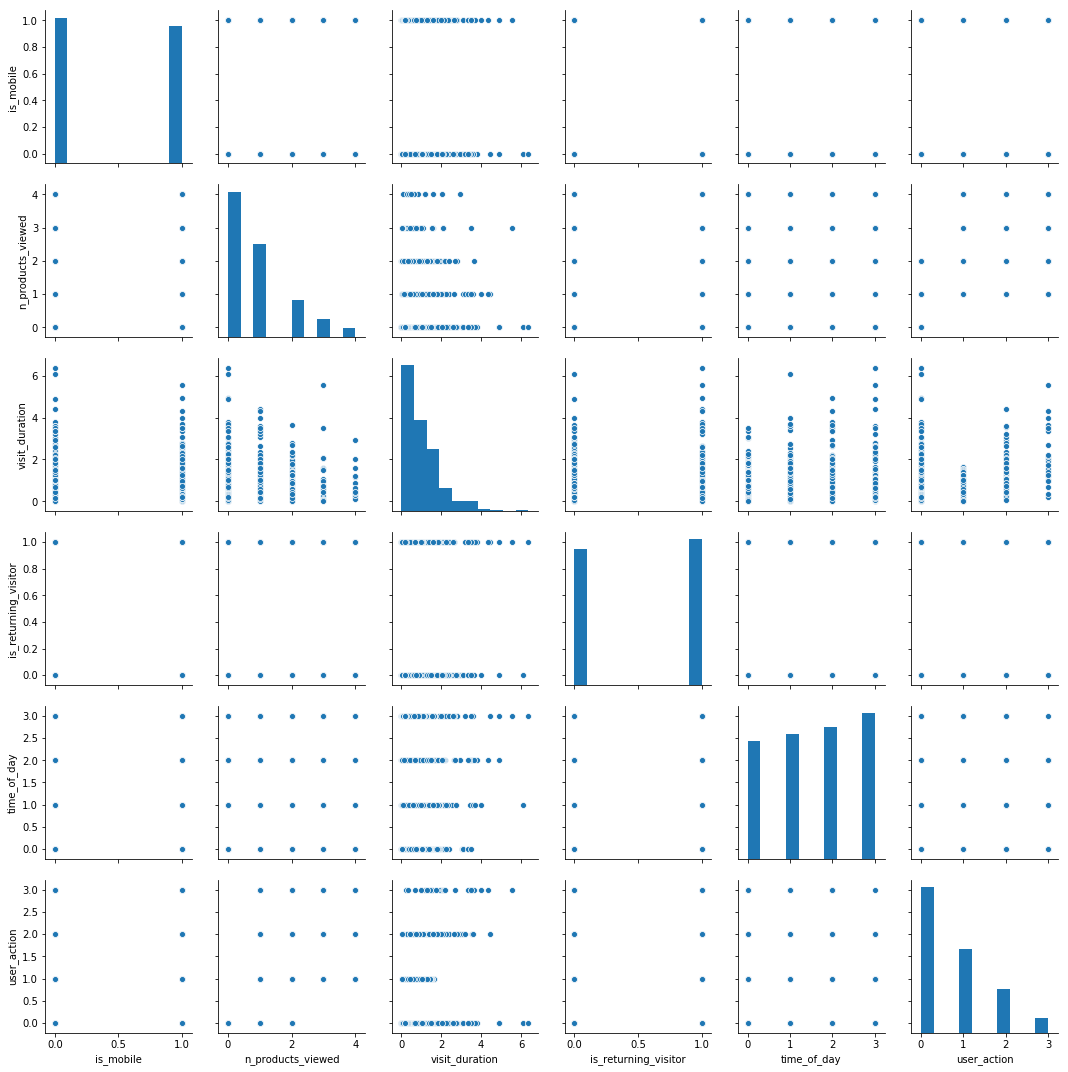

In [9]:
sns.pairplot(data=data)
plt.show()